In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# 그래프 스타일 설정
plt.style.use('seaborn-v0_8')

print("✅ 라이브러리 로드 완료")

✅ 라이브러리 로드 완료


In [6]:
import os
from google.colab import files

# 파일이 없는 경우 업로드 요청
required_files = ['news_classifier_model.pkl', 'test_dataset.csv']
for file in required_files:
    if not os.path.exists(file):
        print(f"🚨 '{file}' 파일이 없습니다. 파일 선택 버튼을 눌러 업로드해주세요.")
        uploaded = files.upload() # 파일 업로드 창 띄우기

# 1. 모델 및 인코더 로드
try:
    saved_object = joblib.load('news_classifier_model.pkl')
    model = saved_object['model']   # 학습된 MLP 파이프라인
    le = saved_object['encoder']    # 라벨 인코더 (숫자 <-> 문자 변환기)
    print("\n✅ 모델 및 라벨 인코더 로드 성공!")
except Exception as e:
    print(f"❌ 모델 로드 실패: {e}")

# 2. Test 데이터셋 로드
try:
    test_df = pd.read_csv('test_dataset.csv')
    print(f"✅ Test 데이터 로드 성공: {len(test_df)}개 샘플")

    # 입력(X)과 정답(y) 분리
    X_test = test_df['headline']
    y_test_text = test_df['category'] # 문자열 라벨 ('Politics'...)

    # 평가를 위해 문자열 정답을 다시 숫자(0, 1...)로 변환 (Ground Truth)
    y_test = le.transform(y_test_text)

except Exception as e:
    print(f"❌ 데이터 로드 실패: {e}")


✅ 모델 및 라벨 인코더 로드 성공!
✅ Test 데이터 로드 성공: 82개 샘플


In [7]:
print("🔮 모델 예측 진행 중...")

# 학습된 파이프라인(TF-IDF + MLP)을 통과하여 예측 수행
y_pred = model.predict(X_test)

print("✅ 예측 완료. 정량적 평가를 시작합니다.")

🔮 모델 예측 진행 중...
✅ 예측 완료. 정량적 평가를 시작합니다.


In [8]:
print("📊 [Classification Report]\n")
# target_names를 지정하여 숫자 대신 카테고리 이름으로 출력
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 핵심 지표 계산
acc = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average='macro')
weighted_f1 = f1_score(y_test, y_pred, average='weighted')

print("-" * 40)
print(f"📌 Accuracy (정확도):     {acc:.4f}")
print(f"⭐ Macro F1-Score:        {macro_f1:.4f} (불균형 데이터 핵심 지표)")
print(f"📌 Weighted F1-Score:     {weighted_f1:.4f}")
print("-" * 40)

if macro_f1 > 0.7:
    print("🎉 훌륭합니다! 불균형 데이터임에도 준수한 성능을 보이고 있습니다.")
else:
    print("⚠️ Macro F1 점수가 다소 낮습니다. 데이터 추가 수집이나 모델 튜닝이 필요할 수 있습니다.")

📊 [Classification Report]

              precision    recall  f1-score   support

  CS_Insight       0.89      0.73      0.80        11
     Economy       0.42      0.40      0.41        20
    Politics       0.54      0.58      0.56        12
     Society       0.56      0.61      0.58        23
  Technology       0.62      0.62      0.62        16

    accuracy                           0.57        82
   macro avg       0.61      0.59      0.60        82
weighted avg       0.58      0.57      0.57        82

----------------------------------------
📌 Accuracy (정확도):     0.5732
⭐ Macro F1-Score:        0.5957 (불균형 데이터 핵심 지표)
📌 Weighted F1-Score:     0.5749
----------------------------------------
⚠️ Macro F1 점수가 다소 낮습니다. 데이터 추가 수집이나 모델 튜닝이 필요할 수 있습니다.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(b

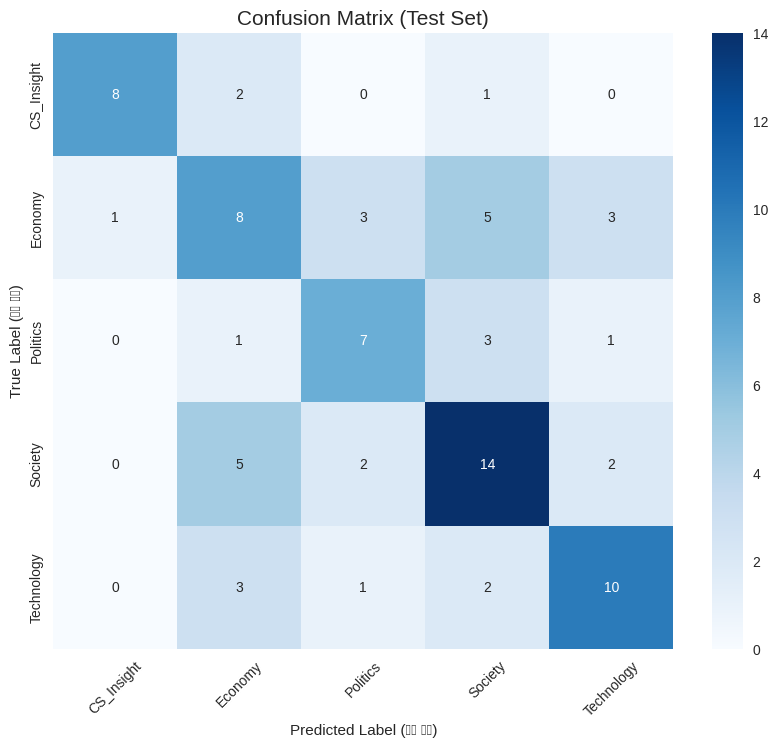

💡 해석: 대각선(진한 색)에 숫자가 몰려 있을수록 잘 분류한 것입니다.


In [9]:
# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)

plt.title('Confusion Matrix (Test Set)', fontsize=15)
plt.xlabel('Predicted Label (모델 예측)')
plt.ylabel('True Label (실제 정답)')
plt.xticks(rotation=45)
plt.show()

print("💡 해석: 대각선(진한 색)에 숫자가 몰려 있을수록 잘 분류한 것입니다.")

In [10]:
# 틀린 데이터의 인덱스 추출
wrong_indices = np.where(y_pred != y_test)[0]

print(f"🔍 오분류 케이스 분석: 총 {len(wrong_indices)}개 오류 발견\n")

# 최대 5개까지만 예시로 출력
for i, idx in enumerate(wrong_indices[:5]):
    headline = X_test.iloc[idx]
    true_label = le.classes_[y_test[idx]]
    pred_label = le.classes_[y_pred[idx]]

    print(f"❌ [Case {i+1}]")
    print(f"   - Headline: \"{headline}\"")
    print(f"   - 정답(True): {true_label}")
    print(f"   - 예측(Pred): {pred_label}")
    print("-" * 50)

🔍 오분류 케이스 분석: 총 35개 오류 발견

❌ [Case 1]
   - Headline: "CDC’s Autism Website ‘Update’ Came Directly From Kennedy, He Says"
   - 정답(True): Politics
   - 예측(Pred): Society
--------------------------------------------------
❌ [Case 2]
   - Headline: "Trump Pledge To End Protections For Minnesota Somalis Sparks Fear And Legal Questions"
   - 정답(True): Politics
   - 예측(Pred): Society
--------------------------------------------------
❌ [Case 3]
   - Headline: "What taxes apply to electric vehicles and how could the Budget change that?"
   - 정답(True): Economy
   - 예측(Pred): Technology
--------------------------------------------------
❌ [Case 4]
   - Headline: "MTG Snuffs Out 2028 Rumor With Rant About ‘Political Industrial Complex’"
   - 정답(True): Politics
   - 예측(Pred): Society
--------------------------------------------------
❌ [Case 5]
   - Headline: "Ozempic Drug Fails to Quell Alzheimer’s in Novo Nordisk Trials"
   - 정답(True): Economy
   - 예측(Pred): Society
-----------------------------